# Gravitational accceleration profile

$\large g_{inside} = g_{0}\left(\frac{r}{R}\right)$

$\large g_{outside} = g_{0}\left(\frac{R}{r}\right)^2$

$r$ - distance from the center of the body

$R$ - the Earth's radius

$g_{0}$ - the surface gravity (Earth: $9.80665 \frac{m}{s^2}$)

In [1]:
import numpy as np

In [2]:
def g_at_distance(g_body, radius, distance):
    # above the surface (radius / distance)^2
    outside = np.divide(radius, distance, where=distance!=0) ** 2
    # below the surface
    inside = (distance / radius)
    return g_body * np.where(distance < radius, inside, outside)

## Examples

### Earth's gravitational accceleration profile

In [3]:
import matplotlib.pyplot as plt

In [4]:
G_0 = 9.80665
EARTH_RADIUS = 6400

LEO_ORBIT = 100
MEO_ORBIT = 2000
HEO_ORBIT = 35786

d = np.arange(0, EARTH_RADIUS + HEO_ORBIT + 2000, 100)
g = g_at_distance(G_0, EARTH_RADIUS, d)

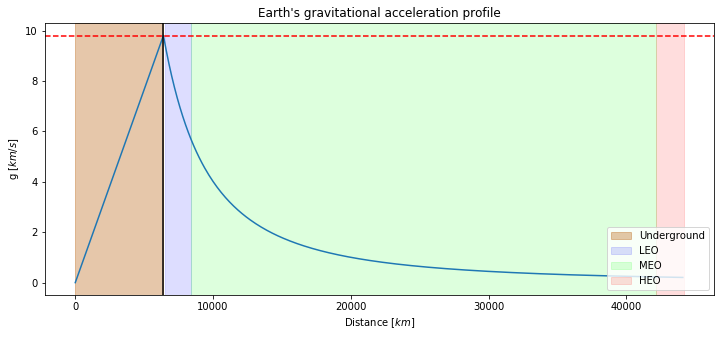

In [5]:
plt.figure(figsize=(12,5))
plt.plot(d, g)
plt.axhline(G_0, linestyle='--', color='r')
plt.axvline(EARTH_RADIUS, linestyle='-', color='k')
plt.axvspan(0, EARTH_RADIUS, color='#b5580155', label='Underground')

# orbits
plt.axvspan(EARTH_RADIUS + LEO_ORBIT, EARTH_RADIUS + MEO_ORBIT, color='#0000ff22', label='LEO')
plt.axvspan(EARTH_RADIUS + MEO_ORBIT, EARTH_RADIUS + HEO_ORBIT, color='#00ff0022', label='MEO')
plt.axvspan(EARTH_RADIUS + HEO_ORBIT, EARTH_RADIUS + HEO_ORBIT + 2000, color='#ff000022', label='HEO')

plt.xlabel('Distance [$km$]')
plt.ylabel('g [$km/s$]')
plt.title('Earth\'s gravitational acceleration profile')
plt.legend(loc='lower right')
plt.show();

### Earth's gravity well

In [6]:
import itertools
bounds = 25000

u = np.arange(-bounds, bounds, 100)
v = np.arange(-bounds, bounds, 100)
P = np.array(list(itertools.product(u, v))).reshape((len(u), len(v), 2))
X, Y = np.meshgrid(u, v)

In [7]:
center = np.array([0,0])
d = np.linalg.norm(P - center, axis=2)

In [8]:
Z = g_at_distance(G_0, EARTH_RADIUS, d)
# flatten values below the surface
Z[d < EARTH_RADIUS] = G_0

In [9]:
# calculate g at the edge of gravity well
g_at_edge = g_at_distance(G_0, EARTH_RADIUS, 2*EARTH_RADIUS)
g_at_edge

2.4516625

In [10]:
center = int(X.shape[0] / 2)

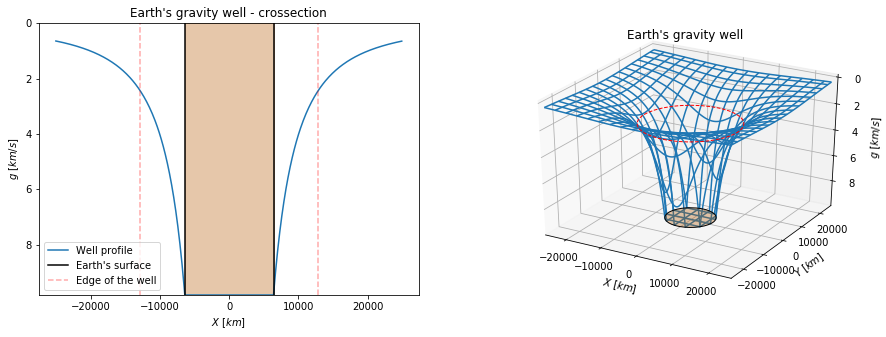

In [11]:
from mpl_toolkits.mplot3d import axes3d
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Circle
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)

ax.plot(X[center, :], Z[center, :], label='Well profile')
ax.set_title('Earth\'s gravity well - crossection')
ax.set_xlabel("$X$ [$km$]")
ax.set_ylabel("$g$ [$km/s$]")

ax.set_ylim([G_0, 0])

ax.axvspan(-EARTH_RADIUS, EARTH_RADIUS, color='#b5580155')
ax.axvline(-EARTH_RADIUS, linestyle='-', color='k')
ax.axvline(EARTH_RADIUS, linestyle='-', color='k', label='Earth\'s surface')
ax.axvline(2*EARTH_RADIUS, linestyle='--', color='#ff000055')
ax.axvline(-2*EARTH_RADIUS, linestyle='--', color='#ff000055', label='Edge of the well')

ax.legend()

ax = fig.add_subplot(122, projection='3d')

p = Circle((0, 0), EARTH_RADIUS, fill=True, facecolor='#b5580155', edgecolor='k')
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=G_0, zdir="z")

p = Circle((0, 0), 2*EARTH_RADIUS, fill=False, linestyle='--', color='r')
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=g_at_edge, zdir="z")

ax.plot_wireframe(X, Y, Z, rstride=30, cstride=30)

ax.set_xlim3d([-bounds,bounds])
ax.set_ylim3d([-bounds,bounds])
ax.set_zlim3d([G_0, 0])
ax.set_title('Earth\'s gravity well')

ax.set_xlabel("$X$ [$km$]")
ax.set_ylabel("$Y$ [$km$]")
ax.set_zlabel("$g$ [$km/s$]")

plt.show()

## Sources

- https://en.wikipedia.org/wiki/Gravitational_acceleration
- https://en.wikipedia.org/wiki/Gravitational_constant
- https://en.wikipedia.org/wiki/Gravity_well
- https://en.wikipedia.org/wiki/Low_Earth_orbit
- https://en.wikipedia.org/wiki/Medium_Earth_orbit
- https://en.wikipedia.org/wiki/High_Earth_orbit